# Example of using Networkx for Grouping

Sample code for using Networkx to identify related parties

### Background:
We have a dataset containing company and director information. Our objective is to group companies that share at least one common director, effectively identifying related entities within the network.

### Assumptions:

A company is considered "related" to another if they share at least one director.
The data is assumed to be clean and free of errors.
The data is provided in a tabular format with columns like "Company ID" and "Director ID".


### Dataset used:
| Company ID | Director ID |
|---|---|
|1|A|
|1|B|
|1|C|
|2|C|
|2|D|
|3|B|
|3|E|
|4|F|
|4|G|
|4|H|

In [1]:
!pip install networkx

In [2]:
import networkx as nx

G = nx.Graph()

In [3]:
import pandas as pd

# Prepare Data
data_dir = r'/Users/peterwirija/Documents/GenAI/Data/Co_Director.xlsx'
_co_id  = 'Company ID'
_director_id = 'Director ID'

df = pd.read_excel(data_dir)
df.rename(columns=lambda x: x.strip())

directors =  df[_director_id].unique().tolist()
companies = df[_co_id].unique().tolist()

## Add nodes 

In [4]:

director_list  = [(director, {'NodeType':'Director'}) for director in directors]
companies_list  = [(company, {'NodeType':'Company'}) for company in companies]
# Add Director nodes to graph
G.add_nodes_from (director_list)
G.add_nodes_from (companies_list)

# Add Edges

In [5]:
# prepare edges
edges = list(zip(df[_co_id], df[_director_id]))
G.add_edges_from(edges)

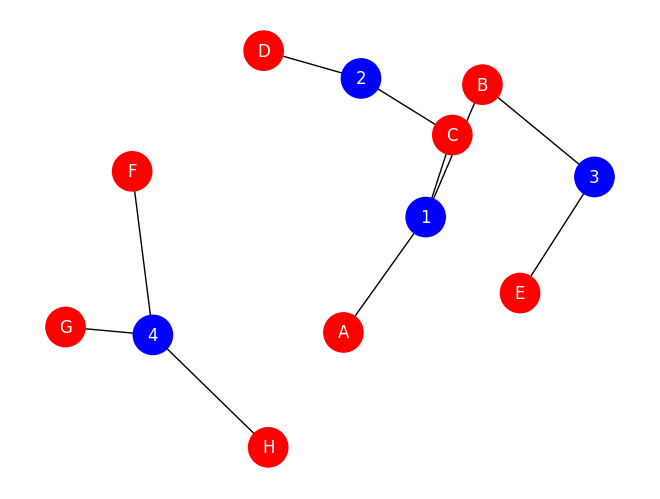

In [38]:
#Drawing for fun

import matplotlib.pyplot as plt
import numpy as np

color_map = {'Director': 'red', 'Company': 'blue'}

# no idea what this does
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
nx.draw(G, pos=pos, 
        with_labels=True, 
        node_color=[color_map[node[1]['NodeType']] 
                    for node in G.nodes(data=True)], 
        node_size=800,
       font_color='white')
plt.show()

In [39]:
[c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[{1, 2, 3, 'A', 'B', 'C', 'D', 'E'}, {4, 'F', 'G', 'H'}]

In [40]:
def identify_connected_companies(G):
  """
  This function takes a NetworkX graph as input and outputs a list containing only the connected components 
  where all nodes have NodeType as Company.

  Args:
      graph: A NetworkX graph object.

  Returns:
      A list of connected components where all nodes have NodeType as Company.
  """
  company_connected_components = []
  component_company_nodes = []
  for component in nx.connected_components(G):
    company_connected_components.append([node for node, node_data in G.nodes(data=True) \
                                         if node in component and node_data['NodeType'] == 'Company'])
  return company_connected_components


identify_connected_companies(G)

[[1, 2, 3], [4]]